In [58]:
import tensorflow as tf


In [108]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# https://drive.google.com/file/d/1s97EiBvek9kY-Xd4HKfaWR6I6BMx7fIU/view?usp=sharing
# id=1s97EiBvek9kY-Xd4HKfaWR6I6BMx7fIU
# beijing_2010.1.1-2014.12.31.csv
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#2. Get the file   #在此处吧你的文件id改进去
downloaded = drive.CreateFile({'id':'1s97EiBvek9kY-Xd4HKfaWR6I6BMx7fIU'}) # replace the id with id of file you want to access
#输入你的文件名字
downloaded.GetContentFile('beijing_2010.1.1-2014.12.31.csv') 

#3. Read file as panda dataframe
import pandas as pd  # 数据分析

data = pd.read_csv("beijing_2010.1.1-2014.12.31.csv")
data



,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [9]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [10]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [12]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [13]:
data['pm2.5'].isna()

0         True
1         True
2         True
3         True
4         True
         ...  
43819    False
43820    False
43821    False
43822    False
43823    False
Name: pm2.5, Length: 43824, dtype: bool

In [14]:
data['pm2.5'].isna().sum()

2067

In [18]:
data=data.iloc[24:].fillna(method='ffill')

In [19]:
data['pm2.5'].isna().sum()

0

In [21]:
import datetime

In [22]:
datetime.datetime(year=2022,month=1,day=1,hour=1)

datetime.datetime(2022, 1, 1, 1, 0)

In [24]:
data['tm']=data.apply(lambda x:datetime.datetime( year=x['year'],
                    month=x['month'],
                    day=x['day'],
                    hour=x['hour']),
                    axis=1 #axis=1表示对行进行该操作
)

In [35]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
tm,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [34]:
# # 可以将tm这个序列设为索引，year,month,day,hour,No这几列已经没有用了可以扔掉
# data.drop(columns=['No','year','month','day','hour'],inplace=True) 
# # inplace=True表示立即生效


KeyError: ignored

In [31]:
# data=data.set_index('tm') #将tm设为索引

KeyError: ignored

In [36]:
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
tm,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [37]:
# 观察注意到cbwd是python对象，有几种取值，我们要把它数值化
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [38]:
data=data.join(pd.get_dummies(data.cbwd))

In [39]:
data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0,0,1,0,0


In [40]:
del data['cbwd']
data

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


观察到风向cbwd只有四个，所以我们直接用get_dummies进行独热编码化
然后把cbwd删掉
那么到目前为止，数据预处理完毕

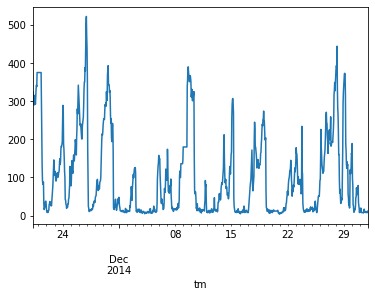

In [42]:
# 看看最后1000次pm2.5的变化
data['pm2.5'][-1000:].plot()


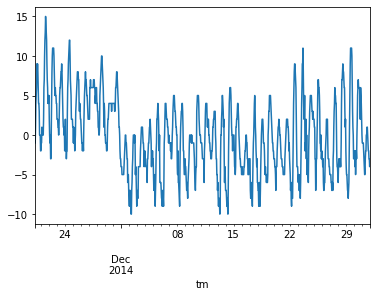

In [43]:
# 看看最后1000次温度的变化
data['TEMP'][-1000:].plot()

In [47]:
# 设置5天为预测所需要的数据长度
# 设置1天为要预测的数据
seq_length=24*5
delay=24*1


In [50]:
data_=[]
for i in range(len(data)-seq_length-delay):
  data_.append(data.iloc[i:i+seq_length+delay])

In [65]:
data_[0].shape[0]

144

In [60]:
data_=np.array([df.values for df in data_])

In [64]:
data_.shape

(43656, 144, 11)

In [72]:
np.random.shuffle(data_)
x=data_[ : ,:5*24 ,: ]
y=data_[ : ,-1 ,0]
split_b=int(data_.shape[0]*0.8)

train_x=x[:split_b]
train_y=y[:split_b]
test_x=x[split_b:]
test_y=y[split_b:]

train_x.shape , train_y.shape

((34924, 120, 11), (34924,))

In [73]:
test_x.shape , test_y.shape

((8732, 120, 11), (8732,))

In [74]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

train_x=(train_x-mean)/std
test_x=(test_x-mean)/std


In [75]:
batch_size=128
model=keras.Sequential()
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam',
       loss='mse',
       metrics=['mae'])
history=model.fit(train_x,train_y,
          batch_size=batch_size,
          epochs=50,
          validation_data=(test_x,test_y))



Epoch 1/50
273/273 [==============================] - 2s 6ms/step - loss: 10467.3643 - mae: 72.6873 - val_loss: 8455.3887 - val_mae: 67.9000
Epoch 2/50
273/273 [==============================] - 1s 4ms/step - loss: 7726.3755 - mae: 64.6238 - val_loss: 7267.5879 - val_mae: 63.2184
Epoch 3/50
273/273 [==============================] - 1s 3ms/step - loss: 7050.3701 - mae: 61.5597 - val_loss: 6881.1392 - val_mae: 61.8700
Epoch 4/50
273/273 [==============================] - 1s 3ms/step - loss: 6725.6733 - mae: 60.1296 - val_loss: 6675.3477 - val_mae: 59.9617
Epoch 5/50
273/273 [==============================] - 1s 3ms/step - loss: 6515.6670 - mae: 59.2040 - val_loss: 6495.3140 - val_mae: 59.8052
Epoch 6/50
273/273 [==============================] - 1s 3ms/step - loss: 6339.3989 - mae: 58.4586 - val_loss: 6454.0903 - val_mae: 59.8928
Epoch 7/50
273/273 [==============================] - 1s 3ms/step - loss: 6216.3657 - mae: 57.9402 - val_loss: 6371.2021 - val_mae: 58.5806
Epoch 8/50
273/273 

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

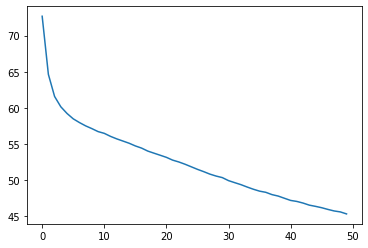

In [93]:
plt.plot(history.epoch,history.history['mae'])

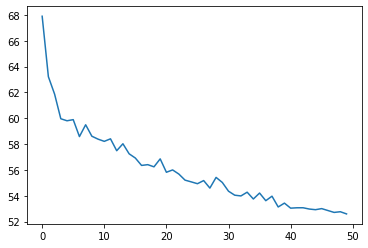

In [83]:
plt.plot(history.epoch,history.history['val_mae'])

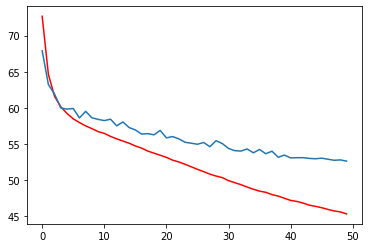

In [94]:
plt.plot(history.epoch,history.history['mae'],c='r')
plt.plot(history.epoch,history.history['val_mae'])

In [114]:
import keras
import keras.callbacks
from keras.callbacks import ReduceLROnPlateau

In [116]:
model=keras.Sequential()
model.add(layers.LSTM(32,input_shape=(120,11),return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))
# ReduceLROnPlateau
lr_reduce=keras.callbacks.ReduceLROnplateau('val_loss',patience=3,factor=0.4,min_lr=0.000001)
# 设置在训练过程中降低学习速率，如果在3个epoch内无变化，那么学习速率就要乘以0.4，但是不能小于min_lr

model.compile(optimizer='adam',
       loss='mse',
       metrics=['mae'])
history=model.fit(train_x,train_y,
          batch_size=batch_size,
          epochs=50,
          callbacks=[lr_reduce],
          validation_data=(test_x,test_y))


AttributeError: ignored

In [109]:
tf.__version__

'2.8.0'

In [120]:
model=keras.Sequential()
model.add(layers.LSTM(32,input_shape=(120,11),return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))
# ReduceLROnPlateau
# ReduceLROnPlateau
lr_reduce=ReduceLROnPlateau('val_loss',patience=3,factor=0.4,min_lr=0.000001)
# 设置在训练过程中降低学习速率，如果在3个epoch内无变化，那么学习速率就要乘以0.4，但是不能小于min_lr

model.compile(optimizer='adam',
       loss='mse',
       metrics=['mae'])
history=model.fit(train_x,train_y,
          batch_size=batch_size,
          epochs=50,
          callbacks=[lr_reduce],
          validation_data=(test_x,test_y))


Epoch 1/50
273/273 [==============================] - 84s 285ms/step - loss: 16059.0205 - mae: 87.9247 - val_loss: 15021.0254 - val_mae: 83.5652 - lr: 0.0010
Epoch 2/50
273/273 [==============================] - 77s 282ms/step - loss: 14413.8594 - mae: 80.2688 - val_loss: 13667.3408 - val_mae: 77.9695 - lr: 0.0010
Epoch 3/50
273/273 [==============================] - 77s 283ms/step - loss: 13184.1816 - mae: 75.5439 - val_loss: 12542.2930 - val_mae: 73.9053 - lr: 0.0010
Epoch 4/50
273/273 [==============================] - 77s 283ms/step - loss: 12160.3652 - mae: 72.0108 - val_loss: 11602.5391 - val_mae: 70.8212 - lr: 0.0010
Epoch 5/50
273/273 [==============================] - 77s 284ms/step - loss: 11309.9551 - mae: 69.3863 - val_loss: 10827.8428 - val_mae: 68.5614 - lr: 0.0010
Epoch 6/50
273/273 [==============================] - 78s 285ms/step - loss: 10610.2773 - mae: 67.5481 - val_loss: 10192.2773 - val_mae: 66.9947 - lr: 0.0010
Epoch 7/50
273/273 [==============================] 

## 最后一步
使用模型进行预测
发现这8732条数据总方差值在2966，均方差值是34

In [121]:
model.save('pm2.5.h5')

In [122]:
model.evaluate(test_x,test_y)

273/273 [==============================] - 12s 45ms/step - loss: 2966.3682 - mae: 34.5268


[2966.3681640625, 34.526763916015625]

### 对多条数据进行预测


In [123]:
test_x.shape

(8732, 120, 11)

In [124]:
pre_test = model.predict(test_x)

In [125]:
pre_test.shape

(8732, 1)

观察前5条预测结果


In [126]:
pre_test[:5]

array([[ 47.317444],
       [238.63373 ],
       [242.70064 ],
       [242.21577 ],
       [ 14.821843]], dtype=float32)

### 对单条数据进行预测

In [127]:
data.tail()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0
2014-12-31 23:00:00,12.0,-21,-3.0,1034.0,249.85,0,0,0,1,0,0


可以看到这个数据集的结尾是2014年的12月31号23：00
考虑预测2015年的1月1号23：00的PM2.5浓度是多少

In [147]:
single_test=data[-120:]
single_test

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2014-12-27 00:00:00,163.0,-10,-5.0,1030.0,1.79,0,0,0,1,0,0
2014-12-27 01:00:00,194.0,-10,-5.0,1030.0,3.58,0,0,0,1,0,0
2014-12-27 02:00:00,187.0,-10,-5.0,1030.0,5.37,0,0,0,1,0,0
2014-12-27 03:00:00,216.0,-11,-6.0,1030.0,7.16,0,0,0,1,0,0
2014-12-27 04:00:00,225.0,-11,-6.0,1030.0,8.95,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [148]:
type(single_test)

pandas.core.frame.DataFrame

In [149]:
single_test=(single_test-mean)/std

In [150]:
single_test=single_test.to_numpy()

In [151]:
single_test

array([[ 0.7145718 , -0.82514745, -1.43862427, ...,  1.45063971,
        -0.73234995, -0.52193479],
       [ 1.05611143, -0.82535306, -1.43901441, ...,  1.44864473,
        -0.73115063, -0.52193479],
       [ 0.98244209, -0.82550392, -1.43925549, ...,  1.44978414,
        -0.73281143, -0.5229117 ],
       ...,
       [-0.96456908, -1.66803878, -1.28165685, ...,  1.45111539,
        -0.73488953, -0.5229117 ],
       [-0.98641713, -1.66764844, -1.36526323, ...,  1.44798078,
        -0.73401182, -0.52229006],
       [-0.94339213, -1.5982361 , -1.28240194, ...,  1.44826527,
        -0.73304221, -0.5228229 ]])

In [152]:
single_test.shape

(120, 11)

训练的模型接受的是3维数据
因此现在需要升一维度

In [153]:
single_test = np.expand_dims(single_test,0)

In [155]:
single_test.shape

(1, 120, 11)

In [156]:
model.predict(single_test)

array([[41.08793]], dtype=float32)